# Algoritmos de machine learning y KNN PARA EL VINO

In [169]:
import pandas as pd

In [170]:
datos = pd.read_csv("winequalityN.csv") 

In [171]:
datos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [172]:
columnas_con_faltantes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

datos = datos.dropna(subset=columnas_con_faltantes)

<Axes: title={'center': 'Cantidad de datos de la calidad del vino'}, xlabel='quality'>

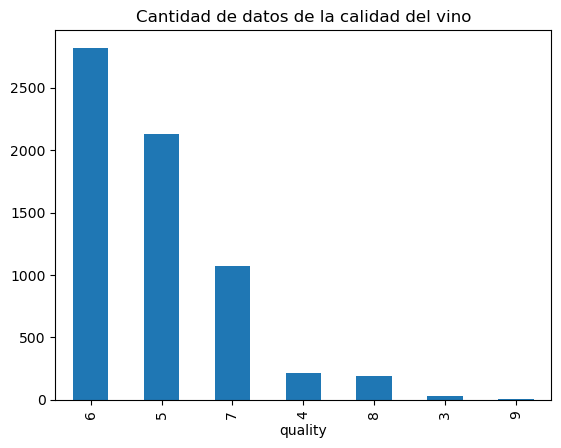

In [173]:
datos["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')

In [276]:
datosn=datos[datos['quality'] != 9]

In [277]:
datosn=datosn[datosn['quality'] != 3]

<Axes: title={'center': 'Cantidad de datos de la calidad del vino'}, xlabel='quality'>

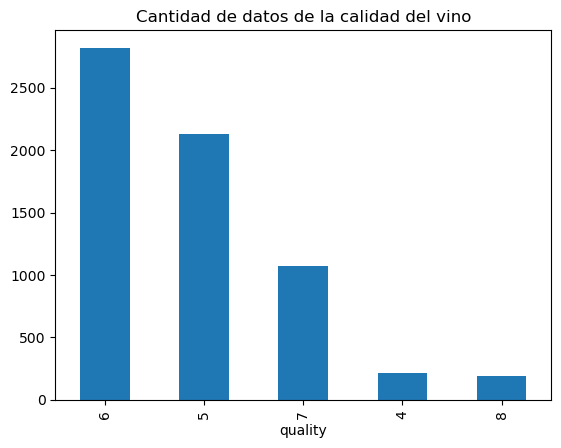

In [278]:
datosn["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')

In [222]:
datosn.loc[datosn['type'] == 'red', 'type'] = 0
datosn.loc[datosn['type'] == 'white', 'type'] = 1

In [223]:
datosn

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [224]:
X = datosn.drop('quality', axis=1)
y = datosn['quality']

In [225]:
from sklearn.preprocessing import MinMaxScaler

# Suponiendo que 'data' contiene tus datos
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(X)

In [226]:
pd.DataFrame(data_normalized)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.264463,0.152,0.216867,0.308282,0.059801,0.320000,0.485207,0.267785,0.217054,0.129213,0.115942
1,1.0,0.206612,0.176,0.204819,0.015337,0.066445,0.094545,0.372781,0.132832,0.449612,0.151685,0.217391
2,1.0,0.355372,0.160,0.240964,0.096626,0.068106,0.210909,0.269231,0.154039,0.418605,0.123596,0.304348
3,1.0,0.280992,0.120,0.192771,0.121166,0.081395,0.334545,0.532544,0.163678,0.364341,0.101124,0.275362
4,1.0,0.280992,0.120,0.192771,0.121166,0.081395,0.334545,0.532544,0.163678,0.364341,0.101124,0.275362
...,...,...,...,...,...,...,...,...,...,...,...,...
6423,0.0,0.247934,0.432,0.048193,0.019939,0.098007,0.196364,0.094675,0.181222,0.542636,0.337079,0.217391
6424,0.0,0.198347,0.416,0.048193,0.021472,0.134551,0.225455,0.112426,0.150183,0.565891,0.202247,0.362319
6425,0.0,0.206612,0.344,0.078313,0.026074,0.111296,0.203636,0.100592,0.166377,0.542636,0.297753,0.434783
6426,0.0,0.173554,0.452,0.072289,0.021472,0.109635,0.225455,0.112426,0.161172,0.658915,0.275281,0.318841


In [251]:
from sklearn.model_selection import train_test_split

### separacion de datos, entrenamiento (70%) y validacion (30%)

In [279]:
X_train, X_val, y_train, y_val = train_test_split(data_normalized, y, test_size=0.3, random_state=42)

# Random Forest

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [282]:
y_pred = rf_classifier.predict(X_val)

In [283]:
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [284]:
def plot(y_val, y_pred):
    labels = unique_labels(y_train)
    column = [f'Predicccion {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

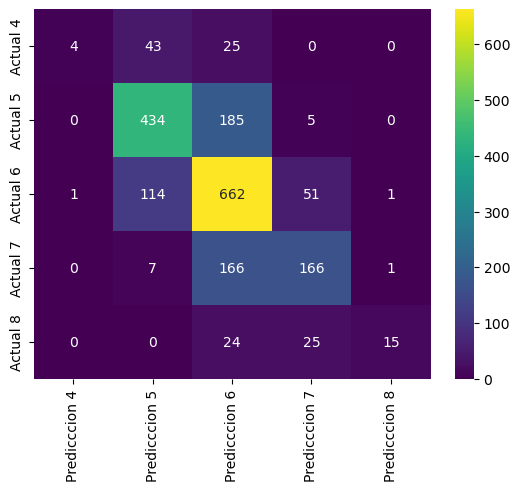

In [285]:
plot(y_val,y_pred)

In [286]:
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred, zero_division=1)
print("Precisión:", accuracy)
print("Informe de Clasificación:\n")
print(classification_rep)

Precisión: 0.6640746500777605
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.80      0.06      0.10        72
           5       0.73      0.70      0.71       624
           6       0.62      0.80      0.70       829
           7       0.67      0.49      0.57       340
           8       0.88      0.23      0.37        64

    accuracy                           0.66      1929
   macro avg       0.74      0.45      0.49      1929
weighted avg       0.68      0.66      0.65      1929



In [287]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_val, y_pred)
calidades = [4, 5, 6, 7, 8]
for calidad in calidades:
    indice = calidad - 4  
    # Verdaderos positivos para la calidad en particular
    tp = conf_matrix[indice, indice]
    # Falsos positivos
    fp = conf_matrix[:, indice].sum() - tp
    # Falsos negativos
    fn = conf_matrix[indice, :].sum() - tp
    # Calcular precisión
    precision = tp / (tp + fp + 1e-12)
    print(f'Precisión para calidad {calidad}: {precision:.4f}')

Precisión para calidad 4: 0.8000
Precisión para calidad 5: 0.7258
Precisión para calidad 6: 0.6234
Precisión para calidad 7: 0.6721
Precisión para calidad 8: 0.8824


# ALGORITMO KNN

In [325]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)

<Axes: >

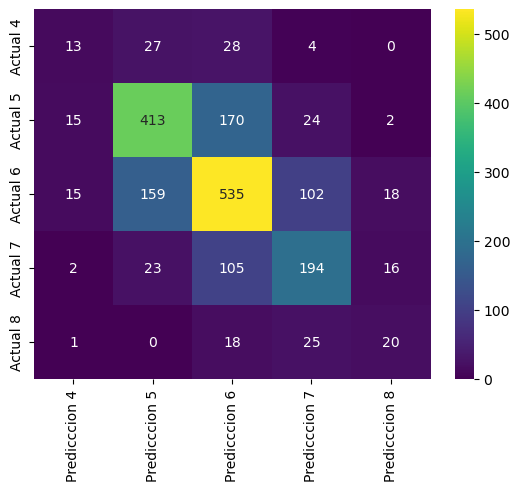

In [326]:
plot(y_val,y_pred2)

In [327]:
accuracy = accuracy_score(y_val, y_pred2)
classification_rep = classification_report(y_val, y_pred, zero_division=1)
print("Precisión:", accuracy)
print("Informe de Clasificación:\n")
print(classification_rep)

Precisión: 0.6091238983929497
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.80      0.06      0.10        72
           5       0.73      0.70      0.71       624
           6       0.62      0.80      0.70       829
           7       0.67      0.49      0.57       340
           8       0.88      0.23      0.37        64

    accuracy                           0.66      1929
   macro avg       0.74      0.45      0.49      1929
weighted avg       0.68      0.66      0.65      1929



In [328]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_val, y_pred2)
calidades = [4, 5, 6, 7, 8]
for calidad in calidades:
    indice = calidad - 4  
    # Verdaderos positivos para la calidad en particular
    tp = conf_matrix[indice, indice]
    # Falsos positivos
    fp = conf_matrix[:, indice].sum() - tp
    # Falsos negativos
    fn = conf_matrix[indice, :].sum() - tp
    # Calcular precisión
    precision = tp / (tp + fp + 1e-12)
    print(f'Precisión para calidad {calidad}: {precision:.4f}')

Precisión para calidad 4: 0.2826
Precisión para calidad 5: 0.6640
Precisión para calidad 6: 0.6250
Precisión para calidad 7: 0.5559
Precisión para calidad 8: 0.3571
